#**Implementation of Multiple Linear Regression Model**


---

**Problem Statement** : 

We have a dataset of **50 start-up companies**. This dataset contains **five main information** for a financial year:

1. R&D Spend
2. Administration Spend
3. Marketing Spend
4. State
5. Profit

Our goal is **to create a model that can easily determine** which company **has a maximum profit** ,

and which is the **most affecting factor for the profit** of a company

Since we need to find the **profit**, it is the **dependent variable**.

The other four variables are independent variables.

**Steps of deploying the MLR model are**:

1. Data pre-processing steps
2. Fitting the MLR model to the training set
3. Predicting the result of test set


---



#**Importing libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mtp


##**Importing dataset**

In [4]:
data = pd.read_csv('https://trello-attachments.s3.amazonaws.com/6062c6af283e86843a32b025/60d0152706cf05391bac797c/0ced7d9ccd720cb82d87e6ff95ee701c/Startups_Data.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


See dem variables?

We are keeping these as our **independent variables**,
1. R&D Spend
2. Administration
3. Marketing spend
4. State

On the basis of those variables, we are going to **predict the profit**

In case you didn't know, **profit** is our **dependent variable**


---




#**Extracting Independent and Dependent Variable**

---


In the code below, we are going to use **x** as our **Ind. variable**

Using the **.iloc[]** method it works this way,

.iloc[IndexYouWantToRetrieve]

**x = data.iloc[:,:-1]** 

**x = data.iloc[(StartingFrom),(EndsHere)(Exclude,e.g -1)]**

In a layman's term,

The first [:] in the code is --> starting from the beginning(the whole dataset)

The second [:] indicates --> we are going through the data until the end

The [-1] indicates --> excludes the data at index[-1] **which is profit**

In [6]:
x = data.iloc[:,:-1].values
x

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida'],
       [131876.9, 99814.71, 362861.36, 'New York'],
       [134615.46, 147198.87, 127716.82, 'California'],
       [130298.13, 145530.06, 323876.68, 'Florida'],
       [120542.52, 148718.95, 311613.29, 'New York'],
       [123334.88, 108679.17, 304981.62, 'California'],
       [101913.08, 110594.11, 229160.95, 'Florida'],
       [100671.96, 91790.61, 249744.55, 'California'],
       [93863.75, 127320.38, 249839.44, 'Florida'],
       [91992.39, 135495.07, 252664.93, 'California'],
       [119943.24, 156547.42, 256512.92, 'Florida'],
       [114523.61, 122616.84, 261776.23, 'New York'],
       [78013.11, 121597.55, 264346.06, 'California'],
       [94657.16, 145077.58, 282574.31, 'New York'],
       [91749.16, 114175.79, 29491

See that?

**Profit is EXCLUDED** from x, and the rest gets saved in the variable **x**

Remember, in x we had values of,
1. R&D Spend
2. Administration
3. Marketing spend
4. State

##**Extracting dependent variable**

This time, we are extracting the profit

data.iloc[:,4] because,

1. We are not specifying where our start is, hence [:].
2. We just want the profit data which is at the index[4]

So, **[:,4]** means that we are **excluding everything EXCEPT** index[4]

To prevent confusion,

 **.iloc[:,:i]** excludes the data at **i**

 **.iloc[:,i]** exclude every data **except i**

In [7]:
y = data.iloc[:,4].values
y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

See that?

All **values(profits)** are stored in the **variable y**

---



#**Encoding Dummy Variables**

In our dataset, we have **one categorical variable** which is **State**.

We cannot apply it **DIRECTLY** to our model. **Why?** In Linear Regression, the equation **requires only numerical features**

We can't predict our profits if the **state** is not numerical (New York, California, Florida etc.)

So, we will encode it! By using the **LabelEncoder class** to convert **categorical values** into **numerical/numbers**

tl;dr need to change we non-categorical values to number

##**Importing LabelEncoder, OneHotEncoder and other stuffs**

In [ ]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer



---


###**Understanding LabelEncoder & OneHotEncoder**

[Read more about LabelEncoder here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)

Encodes target labels with value **between 0 and n_classes-1**

Examples using pictures are, let's say you are dealing with this dataset

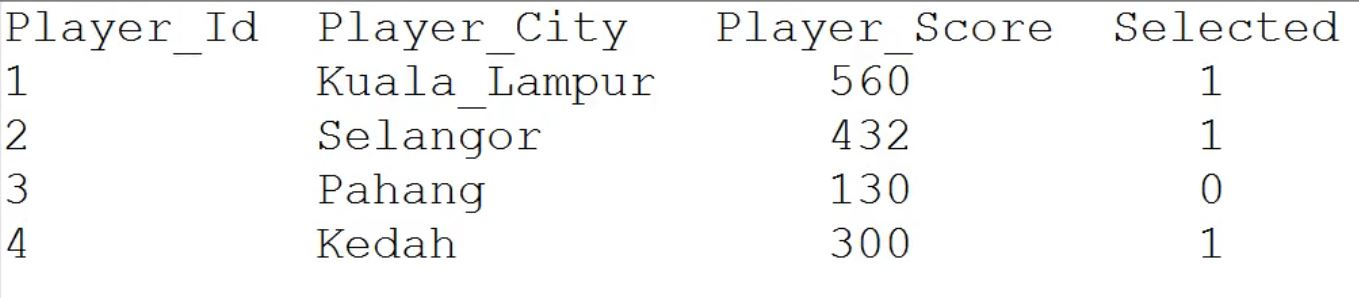

See that? Our **player_city** data is in a **non-numerical value**

So, the LabelEncoder & OneHotEncoder is going to convert it into this..

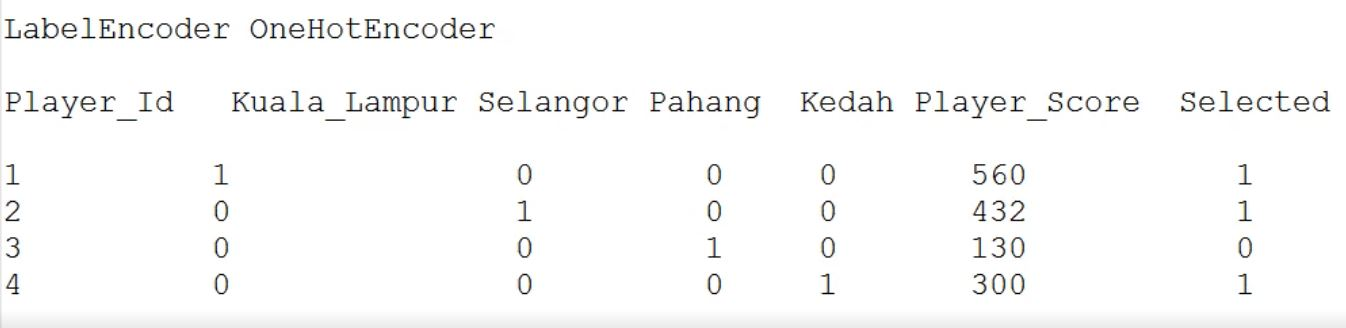

**LabelEncoder & OHEncoder** will sort your data into a column like the above

Instead of saving it as a **text**, **LabelEncoder & OneHotEncoder** will determine if the **player_id** is in **player_city** as 0's and 1's

So if the **player_id** is in **Kuala Lumpur**, the **ML Algorithm** will put it as **1** in the **Kuala_Lumpur** column

If the **player_id** is in **Selangor**, the **ML Algorithm** will put it as **1** in **Selangor** column, and so on..

Anytime you have a new data coming in, if the certain **player_id** fits the matching descriptions of the columns shown, it will identify the **player_id** as a respective to the **new columns of the cities**


---


**Back to this data!** Time to change **state** into numerical features!

##**Converting data from non-numerical to numerical**

---



labelencoder_x = LabelEncoder() --> Allows us to call the methods of LabelEncoder()

.fit_transform(ColumnThatNeedsToBeConverted)

So, x[:,3] because at index[3] we have the data **state**





--> [transformer] is to transform the information that we have(x) 

In the [transformer] we are going to pass **a list of tuples**

[Read more about ColumnTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html)

**Body of the code explained**

transformers = [ ("YourTransformationNameHere") , ClassYouWantToUse , WhichIndex/Column] , [Parameter,remainder = 'passthrough']

Remainder 'passthrough' will only specify the **transformation to be applied on only** **index[3]**


In [ ]:
labelencoder_x = LabelEncoder()

#Calling the methods of LabelEncoder
# Also x[:,3] because we want to update the column,
# Remember, we are converting it from non-numerical to numerical!

x[:,3] = labelencoder_x.fit_transform(x[:,3])
transformer = ColumnTransformer(
    transformers=[
                  ("OneHot", #"OneHot" is just a name, need to pass a name anyway
                   OneHotEncoder(), #Specifying the transformer class
                   [3]) #Specifying the column to be applied(the transformation)
    ],
    remainder = 'passthrough' #This will not apply anything to remaining columns
)

#Calling the object transformer again
x = transformer.fit_transform(x.tolist()) #Transforming x 
x = x.astype('int') #Changing type of variable as integer

###**Getting values of x**

---



See that? It's converting to 0's and 1's like the example of **player_city**!

[0,0,1] = New York

[1,0,0] = California

[0,1,0] = Florida

So the new order would be,

**[CountryCode/Numerical, R&D , admin, marketing]**

[0,0,1,.................................165349, 136897, 471784]

With that, we have successfully converted **state variables** into **dummy variables**!

In [ ]:
x

array([[     0,      0,      1, 165349, 136897, 471784],
       [     1,      0,      0, 162597, 151377, 443898],
       [     0,      1,      0, 153441, 101145, 407934],
       [     0,      0,      1, 144372, 118671, 383199],
       [     0,      1,      0, 142107,  91391, 366168],
       [     0,      0,      1, 131876,  99814, 362861],
       [     1,      0,      0, 134615, 147198, 127716],
       [     0,      1,      0, 130298, 145530, 323876],
       [     0,      0,      1, 120542, 148718, 311613],
       [     1,      0,      0, 123334, 108679, 304981],
       [     0,      1,      0, 101913, 110594, 229160],
       [     1,      0,      0, 100671,  91790, 249744],
       [     0,      1,      0,  93863, 127320, 249839],
       [     1,      0,      0,  91992, 135495, 252664],
       [     0,      1,      0, 119943, 156547, 256512],
       [     0,      0,      1, 114523, 122616, 261776],
       [     1,      0,      0,  78013, 121597, 264346],
       [     0,      0,      1,

**To get a clear idea of how the LabelEncoder works, just compare this data with the original data**

After conversion, we need to..



---


##**Splitting the dataset into training and test sets**

In this step, we are **splitting our dataset into two**, **training and test**. Very important if assuming we are dealing with hundreds of thousands of data/records

At that point of time, you are not going to train the **entire data**, so splitting is necessary!

Training --> for model training

Test set --> for evaluation/checking model performance or accuracy

So once **training prediction** is finished, we are going to compare it with our **test set**

###**Importing packages**

---



In [ ]:
from sklearn.model_selection import train_test_split

###**Testing and Training the Dataset & Model**

---



**Code explained** 

train_test_split(IndVariable,DepVariable,test_size=0.2)

IndVariable,DepVariable --> well, you know

test_size = 0.2 --> 

1. Indicating 20% of the data is the **test set/Testing Dataset**
2. The rest 80% of the data is the **Training Dataset**

random_state = 0 --> So when we're splitting the data, it will happen in random basis

So, it the code will return us 4 values,
1. x_train (Training set of Ind Variable)
2. x_test (Test set of Ind Variable)
3. y_train (Training set of Dep Variable)
4. y_test (Test set of Dep Variable)

**Once the model has been trained, we can use the prediction against the test set to test the model's accuracy**


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
#Showing the % of where the testing/training goes

data.shape

#So from the output of (50,5), 10(20%) startup data is chosen for testing set
#40(80%) data is chosen for training set

(50, 5)

###**Fitting the MLR into the training dataset**

---



Since we are not passing the entire dataset, we are using the **training set values of x and y, x_train & y_train**

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

####**Predicting the test set results**

Same thing, not passing the entire dataset, we are passing **the testing dataset, x_test**

In [ ]:
y_pred = regressor.predict(x_test)

**Printing the actual values**

In [ ]:
y_test

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

**Printing the predicted values**

In [ ]:
y_pred

array([103015.24646785, 132581.94062687, 132448.09397396,  71975.74395634,
       178537.52007853, 116161.05196901,  67851.47761322,  98791.74112204,
       113969.41004647, 167921.22416079])



---


##**Checking our model performance**

How accurate is our model?

In **y_test** we have our original values, in **x_test** we have our IndVariable

So, we are going to evaluate our predictions against values in **y_test(original)**

In [ ]:
from sklearn.metrics import r2_score

accuracy = r2_score(y_test, regressor.predict(x_test))

print("The model accuracy is :",accuracy)

The model accuracy is : 0.9347065984136423


Great! Our model is **93% accurate**. So, we can deploy this model!

The closer it is to **1.0 or 100%** the better it is.

Roughly, we are preferring a model with accuracy of **higher than 0.9**

#**Taking User Inputs and Making Predictions Based on the Input**

This time, we are going to take some **user inputs** and we are going to predict **the profits**

We trained our model, so based on that model we are going to make our prediction.

So in this cell we are going to:

1. Determining the user's state
2. Take r&d expenditure
3. Take administration expenditure
4. Take marketing spend

Based on the inputs, we need to predict the **profits**

The strategy for the inputs are:
1. Map the values
2. Convert the values into a pandas dataframe (so our ML model can predict)

In [ ]:
california = int(input('Are you from California? 1 for Yes, 0 for No: '))
florida = int(input('Are you from Florida? 1 for Yes, 0 for No: '))
newYork = int(input('Are you from New York? 1 for Yes, 0 for No: '))

r_d = int(input('How much did you spend for R&D? : '))
admin = int(input('How much did you spend for admin expenditures? : '))
marketing = int(input('How much did you spend for marketing? : '))

##Mapping values

datadict = {'california' : california , 'florida' : florida , 'newYork': newYork,
         'r_d':r_d , 'admin':admin, 'marketing': marketing}

#Converting into a pandas dataframe

user_input = pd.DataFrame(datadict,index=[0],columns=['california', 'florida', 'newYork',
                                             'r_d','admin','marketing'])

##Making predictions
predict_profit = regressor.predict(user_input)
print("\n Predicted profit of the Startup is : ",predict_profit[0])





Are you from California? 1 for Yes, 0 for No: 1
Are you from Florida? 1 for Yes, 0 for No: 0
Are you from New York? 1 for Yes, 0 for No: 0
How much did you spend for R&D? : 162597
How much did you spend for admin expenditures? : 151377
How much did you spend for marketing? : 443898

 Predicted profit of the Startup is :  189547.19591365475


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
